<a href="https://colab.research.google.com/github/LankaMuhandiram/Deep-Learning-Mini-Project-01/blob/main/deep2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
os.chdir("/content/drive/My Drive/mini project 2/")
os.getcwd()

'/content/drive/My Drive/mini project 2'

In [184]:
df=pd.read_csv('Srilankan Airlines.csv')


In [185]:
df

,Date,Open,Close,High,Low
0,17/05/2023,44.74%,44.75%,44.75%,44.74%
1,18/05/2023,45.31%,44.74%,45.31%,44.74%
2,19/05/2023,44.73%,44.23%,44.73%,44.22%
3,22/05/2023,41.71%,41.61%,41.71%,39.64%
4,23/05/2023,40.67%,41.13%,41.13%,39.68%
...,...,...,...,...,...
195,19/02/2024,58.55%,58.56%,58.56%,58.55%
196,20/02/2024,59.05%,58.81%,59.05%,58.81%
197,21/02/2024,59.02%,58.72%,59.02%,58.72%
198,22/02/2024,59.00%,59.10%,59.10%,58.70%


In [187]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date']

0     2023-05-17
1     2023-05-18
2     2023-05-19
3     2023-05-22
4     2023-05-23
         ...    
195   2024-02-19
196   2024-02-20
197   2024-02-21
198   2024-02-22
199   2024-02-23
Name: Date, Length: 200, dtype: datetime64[ns]

In [188]:
df.sort_values('Date', inplace=True)

In [189]:
df.set_index('Date', inplace=True)

In [190]:
data = df['Close'].values.reshape(-1, 1)


In [192]:
data = np.array([row[0].replace('%', '') for row in data]).astype(float)


In [204]:
data = data.reshape(-1, 1)

In [205]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

In [206]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [207]:
look_back = 30

In [208]:
X, y = create_dataset(data_normalized, look_back)


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [210]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [211]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [212]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
5/5 [==============================] - 2s 4ms/step - loss: 0.1433
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0307
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0172
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 13/100
5/5 [==============================] - 0s 3ms/st

In [213]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [214]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [215]:
train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
print('Train Score: %.2f RMSE' % train_score)
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print('Test Score: %.2f RMSE' % test_score)

Train Score: 0.75 RMSE
Test Score: 0.64 RMSE


In [217]:
print(test_predict.shape)


(34, 1)


In [220]:
print(testPredictPlot[len(train_predict) + (look_back * 2):len(data_normalized) - 1, :].shape)


(3, 1)


In [221]:
test_predict = test_predict.reshape(-1, 1)


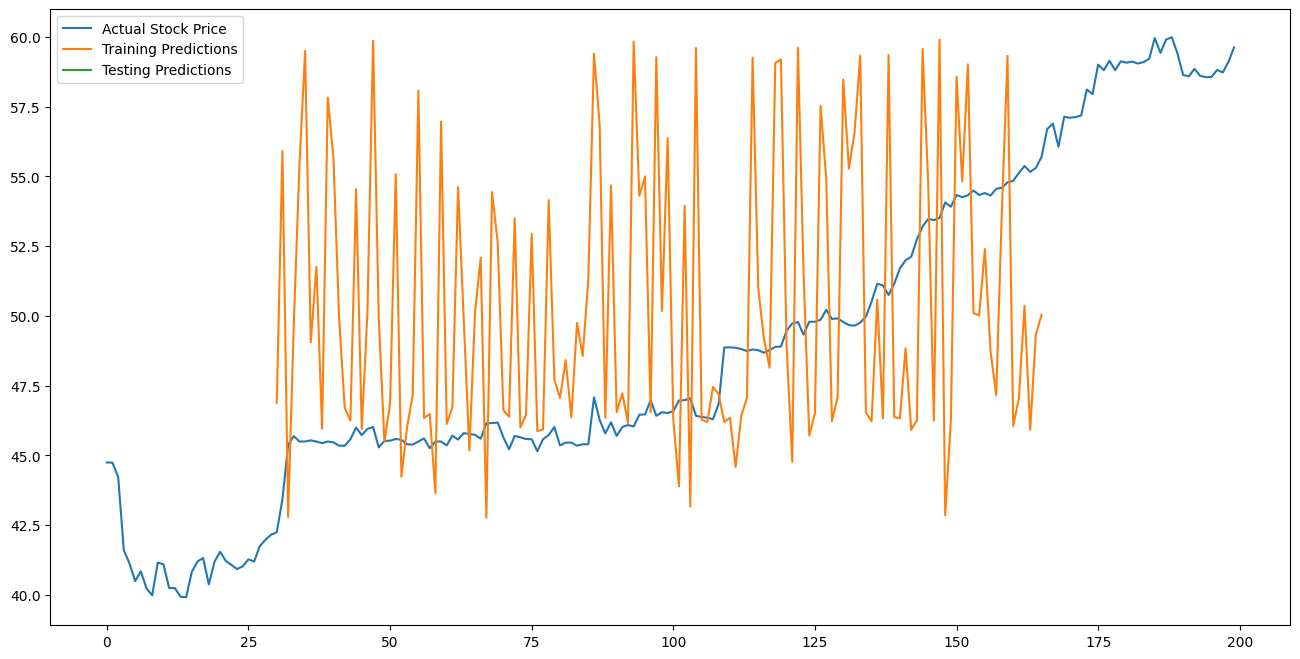

In [224]:
plt.figure(figsize=(16, 8))
plt.plot(scaler.inverse_transform(data_normalized), label='Actual Stock Price')
plt.plot(trainPredictPlot, label='Training Predictions')
plt.plot(testPredictPlot, label='Testing Predictions')
plt.legend()
plt.show()